# 📊 Histogram Representations in OpenCV

### **In this lesson we'll learn:**  
View the **RGB Histogram representations** of images  

---

## ✅ Understanding `cv2.calcHist()`

`cv2.calcHist()` computes the histogram of an image, showing how pixel intensities are distributed.

- **images** → Input image to analyze (`uint8` or `float32`).  
  Always passed as a list: `[img]`

- **channels** → Channel index to compute histogram  
  - For **BGR images (OpenCV default)**  
    - `[0]` → Blue  
    - `[1]` → Green  
    - `[2]` → Red  
  - For **RGB images (after conversion)**  
    - `[0]` → Red  
    - `[1]` → Green  
    - `[2]` → Blue  

- **mask** → `None` to analyze the whole image,  
  or a mask to analyze only a specific region

- **histSize** → Number of bins (slots) used to count pixel values  
  For an 8-bit image, `[256]` means **one bin for each value from 0 to 255**

- **ranges** → Range of pixel values to consider  
  `[0, 256]` means count values from **0 up to 255** (256 excluded)

---



In [13]:
# ==========================================
# Setup: Import Libraries & Utility Functions
# ==========================================

import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

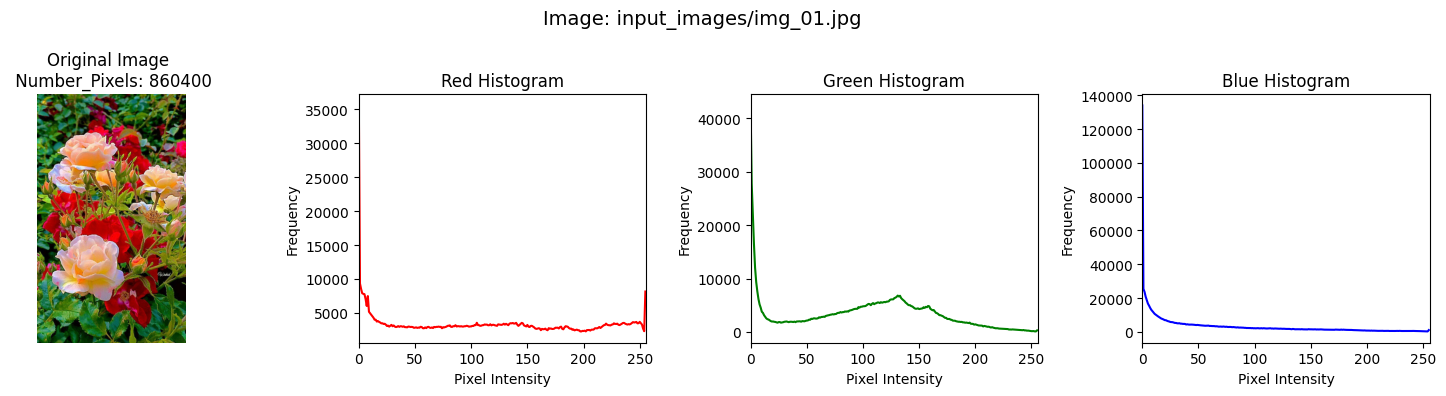

In [14]:
# -----------------------------
# Load a single image
# -----------------------------
image_path = "input_images/img_01.jpg"
image = cv2.imread(image_path)              # Load image in BGR format (OpenCV default)

num_pixels = image.shape[0] * image.shape[1] 

if image is None:
    raise ValueError("Image not found!")     # Stop execution if image is missing

# -----------------------------
# Convert BGR to RGB
# -----------------------------
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
# Convert image to RGB for correct visualization and histogram meaning

# -----------------------------
# Compute RGB histograms
# -----------------------------
colors = ("r", "g", "b")                     # Colors for plotting
channel_names = ("Red", "Green", "Blue")     # Channel names
histograms = []                              # Store histograms

for i in range(3):                           # Loop through R, G, B channels
    hist = cv2.calcHist(
        [image_rgb],                         # Use RGB image
        [i],                                 # Channel index
        None,                                # No mask
        [256],                               # 256 intensity bins (0–255)
        [0, 256]                             # Intensity range
    )
    histograms.append(hist)                  # Store histogram

# -----------------------------
# Plot results (1x4 layout)
# -----------------------------
plt.figure(figsize=(15, 4))                  # Set figure size
plt.suptitle(f"Image: {image_path}", fontsize=14)

# Plot original image
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)                        # Show RGB image
plt.title(f"Original Image \n Number_Pixels: {num_pixels}")
plt.axis("off")                              # Hide axes

# Plot RGB histograms
for i, (col, name) in enumerate(zip(colors, channel_names)):
    plt.subplot(1, 4, i + 2)
    plt.plot(histograms[i], color=col)       # Plot channel histogram
    plt.title(f"{name} Histogram")
    plt.xlabel("Pixel Intensity")             # X-axis = intensity (0–255)
    plt.ylabel("Frequency")                   # Y-axis = pixel count
    plt.xlim([0, 256])                        # Fix intensity range

plt.tight_layout()                           # Adjust spacing
plt.show()                                   # Display the plots


### How to read a color histogram (Very Simple)

- Image size = **600 × 600**
- Total pixels = **360,000**

If the **Green histogram** shows:
- **Pixel value = 200**
- **Frequency = 2000**

👉 This means:
- Out of **360,000 pixels**, only **2000 pixels**
- Have **green color intensity exactly equal to 200**

### Important points to remember

- A histogram does **NOT** show how much area is green
- It only counts **pixel values**
- One pixel contributes to **Red, Green, and Blue** histograms

### Example

A pixel like this:
- Red = 60
- Green = 200
- Blue = 180

This **single pixel**:
- Adds **1 count** at 200 in the green histogram
- Adds **1 count** at 180 in the blue histogram
- Adds **1 count** at 60 in the red histogram

### Final takeaway

> Histogram bars show **how many pixels have a specific brightness value**,  
> not how much of the image looks like that color.


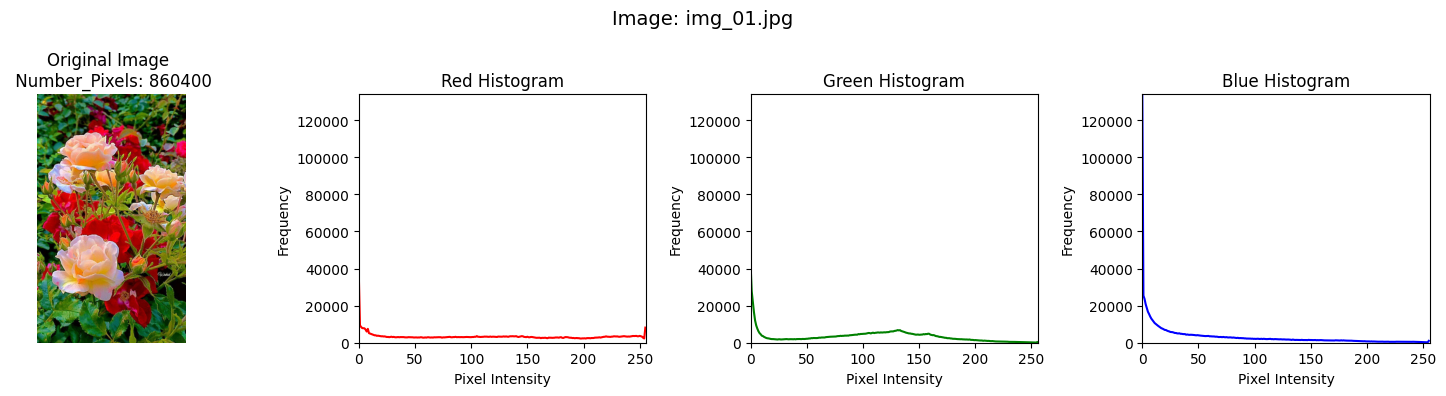

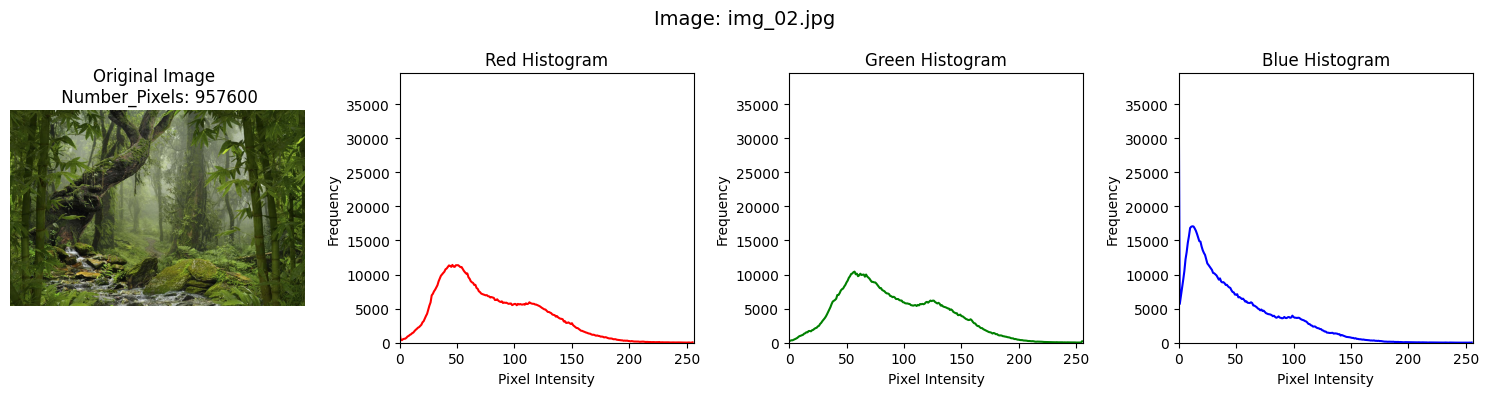

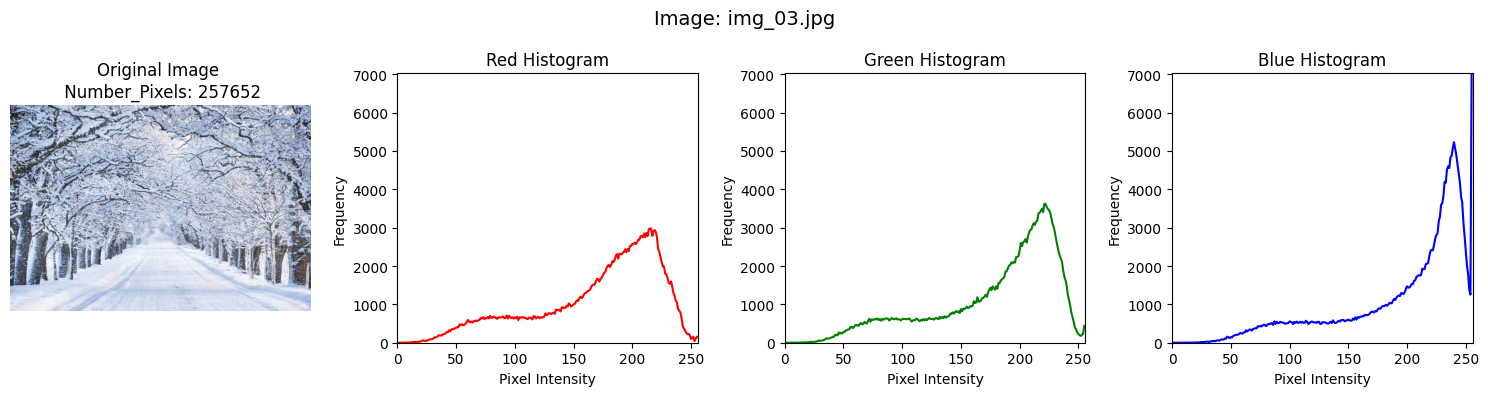

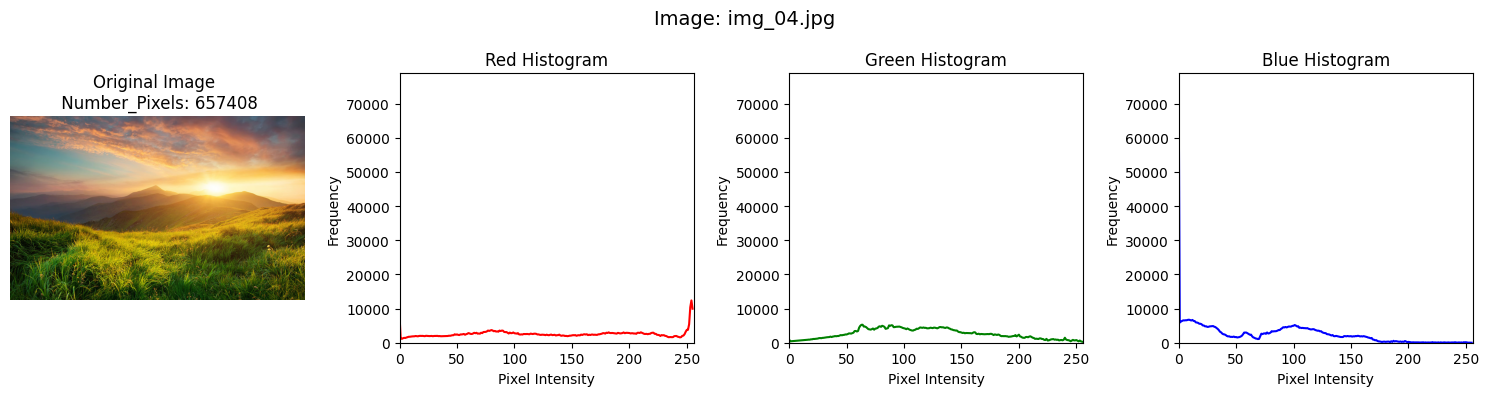

In [12]:
# Input directory containing images
input_dir = "input_images"

# Get all image file names from directory
image_files = os.listdir(input_dir)

for img_name in image_files:
    img_path = os.path.join(input_dir, img_name)  # Full image path
    image = cv2.imread(img_path)                  # Load image in BGR
    
    num_pixels = image.shape[0] * image.shape[1] 

    if image is None:
        print(f"⚠️ Could not read {img_name}")     # Skip unreadable files
        continue

    # Convert BGR to RGB for correct visualization and histogram meaning
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # -----------------------------------------
    # Compute RGB histograms
    # -----------------------------------------
    colors = ("r", "g", "b")                       # Plot colors (RGB)
    channel_names = ("Red", "Green", "Blue")       # Correct channel names
    histograms = []

    for i in range(3):                             # Loop through R, G, B
        hist = cv2.calcHist(
            [image_rgb],                           # Use RGB image
            [i],                                   # Channel index
            None,                                  # No mask (full image)
            [256],                                 # 256 bins
            [0, 256]                               # Intensity range
        )
        histograms.append(hist)

    # Find max Y value to keep histogram scale same
    max_y_value = max(hist.max() for hist in histograms)

    # -----------------------------------------
    # Plot the figure (1x4 layout)
    # -----------------------------------------
    plt.figure(figsize=(15, 4))
    plt.suptitle(f"Image: {img_name}", fontsize=14)

    # ---- Subplot 1: Original image ----
    plt.subplot(1, 4, 1)
    plt.imshow(image_rgb)
    plt.title(f"Original Image \n Number_Pixels: {num_pixels}")
    plt.axis("off")

    # ---- Subplots 2–4: RGB Histograms ----
    for i, (col, name) in enumerate(zip(colors, channel_names)):
        plt.subplot(1, 4, i + 2)
        plt.plot(histograms[i], color=col)
        plt.title(f"{name} Histogram")
        plt.xlabel("Pixel Intensity")               # 0–255
        plt.ylabel("Frequency")                     # Pixel count
        plt.xlim([0, 256])                          # Fixed X-axis
        plt.ylim([0, max_y_value])                  # Fixed Y-axis

    plt.tight_layout()
    plt.show()